In [68]:
%pylab inline
from IPython.core.display import HTML
from ipywidgets import interact, ToggleButtons
import os
import numpy as np
from src.helper import load_from_file
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/jmain01/home/JAD003/sxr01/zxh52-sxr01/miniconda2/py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <p>{0}</p>
    <audio controls="controls" style="width:600px" >
      <source src="files/{0}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(filepath)
    display(HTML(src))

In [70]:
def play(file_id):
    file_path = os.path.join('data', 'Blizzard2017', 'wav', file_id + '.wav')
    wavPlayer(file_path)

def load_from_gen_feats(experiment_name, feat_name):
    feat_dir = os.path.join('results', 'generation', experiment_name, 'features', feat_name)
    file_ids = map(lambda f: f.split('.')[0], os.listdir(feat_dir))
    
    return file_ids, np.array(map(lambda f: load_from_file(os.path.join(feat_dir, f), '.'+feat_name), file_ids))

In [71]:
file_ids, cat_predictions = load_from_gen_feats('categorical_width-200', 'cat')
cat_predictions.shape

(7519, 4)

In [72]:
top_n = 10

# ['ang', 'hap', 'neu', 'sad']
top_ang = sorted(zip(file_ids, cat_predictions), key=lambda (f, c): -c[0])[:top_n]
top_hap = sorted(zip(file_ids, cat_predictions), key=lambda (f, c): -c[1])[:top_n]
top_neu = sorted(zip(file_ids, cat_predictions), key=lambda (f, c): -c[2])[:top_n]
top_sad = sorted(zip(file_ids, cat_predictions), key=lambda (f, c): -c[3])[:top_n]

In [11]:
for file_id, val in top_sad:
    print(file_id)
    print(val)
    play(file_id)
    print

Macbeth_012_002
[ 0.01873716  0.02307924  0.0195741   0.93860948]



AMidsummerNightsDream_015_001
[ 0.00689576  0.03308258  0.02453109  0.93549061]



TheFirebird_025_005
[ 0.00611403  0.04197394  0.01726934  0.93464273]



GoldilocksAndTheThreeBears_014_007
[ 0.00686445  0.04302632  0.0164903   0.9336189 ]



TheMousesWedding_001_000
[ 0.00866686  0.03801662  0.02125179  0.93206477]



SorcerersApprentice_004_005
[ 0.01922804  0.0314394   0.01758972  0.93174279]



Macbeth_004_006
[ 0.01143424  0.03553213  0.0216638   0.93136984]



TheFirebird_023_006
[ 0.01459186  0.03428321  0.02097962  0.93014526]



PrinceAndThePauper_031_012
[ 0.01236291  0.03473987  0.02549996  0.92739731]



KingDonkeyEars_002_002
[ 0.01396779  0.02937487  0.02963112  0.92702615]


In [73]:
file_ids[0], cat_predictions[0]

('PussInBoots_006_004',
 array([ 0.15920641,  0.3048633 ,  0.36626515,  0.16966511], dtype=float32))

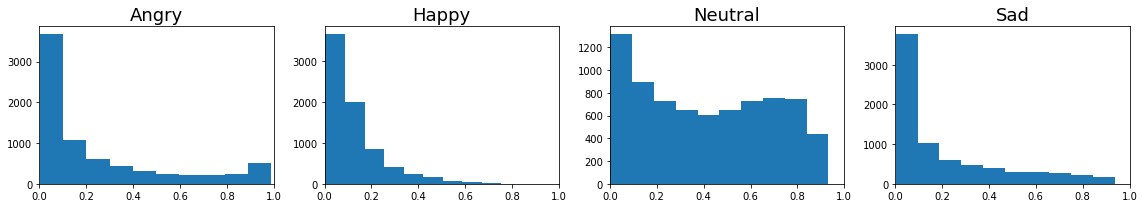

In [86]:
emotion_set = ['Angry', 'Happy', 'Neutral', 'Sad']
fig, axs = plt.subplots(1, len(emotion_set), figsize=(16, 3))
for i, e in enumerate(emotion_set):
    axs[i].hist(cat_predictions[:,i])
    axs[i].set_title(e, fontsize=18)
    axs[i].set_xlim(0., 1.)
        
plt.tight_layout()
plt.savefig('results/graphs/blizzard-cat-flat.pdf')

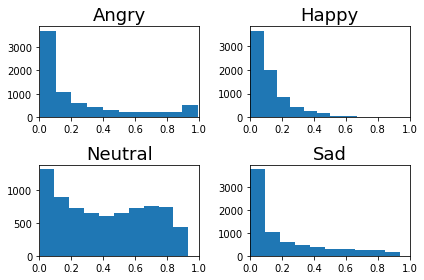

In [91]:
emotion_set = ['Angry', 'Happy', 'Neutral', 'Sad']
width = height = len(emotion_set)/2
fig, axs = plt.subplots(height, width, figsize=(6, 4))
for i in range(height):
    for j in range(width):
        idx = i*width + j
        axs[i, j].hist(cat_predictions[:,idx])
        axs[i, j].set_title(emotion_set[idx], fontsize=18)
        axs[i, j].set_xlim(0., 1.)
        
plt.tight_layout()
plt.savefig('results/graphs/blizzard-cat.pdf')

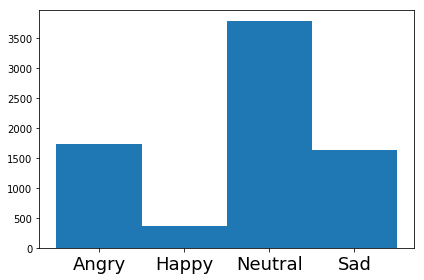

In [50]:
plt.subplots(1, figsize=(6, 4))
plt.hist(np.argmax(cat_predictions, axis=1), bins=[0,1,2,3,4])
plt.xticks(np.arange(0.5, 3.51, 1.), emotion_set, fontsize=18);
plt.tight_layout()
plt.savefig('results/graphs/blizzard-preds.pdf')

In [34]:
file_ids2, dim_predictions = load_from_gen_feats('categorical_width-200', 'dim')
dim_predictions.shape

(7519, 3)

In [35]:
top_n = 10

# ['val', 'act', 'dom']
top_val = sorted(zip(file_ids2, dim_predictions), key=lambda (f, c): -c[0])[:top_n]
top_act = sorted(zip(file_ids2, dim_predictions), key=lambda (f, c): -c[1])[:top_n]
top_dom = sorted(zip(file_ids2, dim_predictions), key=lambda (f, c): -c[2])[:top_n]

In [20]:
for file_id, val in top_val:
    print(file_id)
    print(val)
    play(file_id)
    print

RobinHood_youngreading_017_003
[ 0.8443523   0.48246452  0.39955333]



PhantomOfTheOpera_010_012
[ 0.83556789  0.45381761  0.35947284]



Dinosaurs_001_002
[ 0.82890785  0.47005084  0.39374891]



Dinosaurs_022_014
[ 0.82643712  0.44524574  0.40691382]



RomeoAndJuliet_010_000
[ 0.82090706  0.4394742   0.34812927]



RobinHood_youngreading_028_005
[ 0.81890261  0.48817763  0.47121733]



Dinosaurs_022_019
[ 0.80844587  0.49154651  0.37640363]



Dinosaurs_003_004
[ 0.80098951  0.48028433  0.41541937]



Dinosaurs_014_001
[ 0.8000502   0.45902288  0.34981096]



Dinosaurs_002_001
[ 0.7920633   0.4071995   0.35072806]


In [36]:
file_ids2[0], dim_predictions[0]

('RainyDay_000_020',
 array([ 0.38067791,  0.41097757,  0.49501446], dtype=float32))

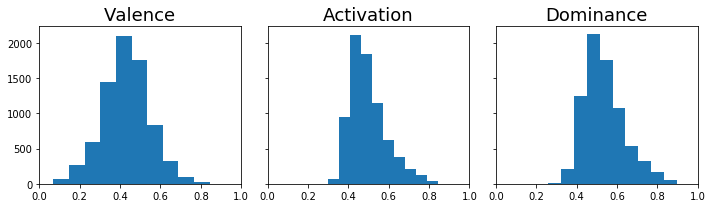

In [67]:
emotion_set2 = ['Valence', 'Activation', 'Dominance']
fig, axs = plt.subplots(1, len(emotion_set2), figsize=(10, 3), sharey=True)
for i, e in enumerate(emotion_set2):
    axs[i].hist(dim_predictions[:,i])
    axs[i].set_title(e, fontsize=18)
    axs[i].set_xlim(0., 1.)

plt.tight_layout()
plt.savefig('results/graphs/blizzard-dim.pdf')

In [2]:
import os
import numpy as np
import pandas as pd

os.environ['project_DIR'] = os.path.join(os.environ['HOME'], 'IS18_control_space')
os.environ['SOURCE_DIR'] = os.path.join(os.environ['HOME'], 'data')
os.environ['DATA_DIR'] = os.path.join(os.environ['project_DIR'], 'data')

from src.load import IEMOCAPData, categories, CATEGORIES

In [3]:
dp = IEMOCAPData(data_config=dict(
    emotion_set=['ang', 'hap', 'neu', 'sad'],
    emotion_mask=np.in1d(categories, ['ang', 'hap', 'neu', 'sad']),
    load_wavefile=False, gen_spectrogram=False,
    load_func_features=False,
    load_lld_features=False,
    load_phone_alignment=False,
    load_transcription=False,
    load_emo_labels=True
))

In [4]:
utt_names = []
annotator_classes = []
for batch in dp.all_data():
    utt_names.extend(batch.utt_name)
    annotator_classes.extend(batch.target_cat_anno)

In [5]:
len(utt_names)

4476

In [6]:
len(annotator_classes)

4476

In [7]:
for i in range(len(utt_names)):
    annotator_classes[i]['utt_name'] = utt_names[i]

In [29]:
# annotator_names = list(set().union(*map(dict.keys, annotator_classes)))
annotator_names = ['F1', 'F2', 'F3', 'M5', 'M1', 'M3', 'E5', 'E4', 'E6', 'E1', 'E3', 'E2']

In [9]:
df = pd.DataFrame(annotator_classes)
df = df.set_index('utt_name')

In [44]:
def without_annotator(df, name, columns=annotator_names):
    columns = [col for col in columns if col != name]
    return df[df[name].notna()][columns]

def only_annotator(df, name):
    return df[df[name].notna()][[name]]

def argmax_row(row):
    vec = np.zeros(len(CATEGORIES))
    for item in row:
        if item is not np.nan:
            labs = np.in1d(CATEGORIES, item)
            vec += labs / (sum(labs) + 1e-12)
    return CATEGORIES[np.argmax(vec)]

def correct_row(name):
    return lambda row: len(row[name]) == 1 and row['consensus'] == row[name][0]

def accuracy(df, name):
    without = without_annotator(df, name)
    preds = without.apply(argmax_row, axis=1)
    
    anno = only_annotator(df, name)
    anno['consensus'] = preds.values
    correct = anno.apply(correct_row(name), axis=1)
    
    return correct.sum() / float(correct.shape[0])

In [49]:
for annotator in annotator_names:
    try:
        print('{} {:.1f}%'.format(annotator, accuracy(df, annotator)*100.))
    except:
        print('{} error'.format(annotator))

F1 45.2%
F2 49.2%
F3 37.8%
M5 44.8%
M1 70.1%
M3 50.9%
E5 34.2%
E4 42.6%
E6 40.0%
E1 46.6%
E3 54.2%
E2 58.1%


In [50]:
np.mean([45.2, 49.2, 37.8, 44.8, 70.1, 50.9, 34.2, 42.6, 40.0, 46.6, 54.2, 58.1])

47.808333333333337

In [51]:
len(CATEGORIES)

10